# DỰ ĐOÁN 1 NGƯỜI CÓ MUA XE ĐẠP HAY KHÔNG


In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# DATA PREPROCESSING + AVOID OVERFITTING BY FEATURES SELECTION

In [ ]:
data = pd.read_csv('bike_buyers.csv')
print(data.shape)
data.head(6)

In [ ]:
data.isna().sum()

In [ ]:
data.info()

In [ ]:
data = data.dropna()
# data = data.drop(['ID'], axis=1)
data.info()

In [233]:
# Tranform data
from sklearn.preprocessing import LabelEncoder

types = data.dtypes
names = list(data.columns)

le = LabelEncoder()
for i in range(len(types)):
    if types.iloc[i]=='object':
        le.fit_transform(data[names[i]])
        data[names[i]] = le.transform(data[names[i]])

print(data.head())

      ID  Marital Status  Gender   Income  Children  Education  Occupation  \
0  12496               0       0  40000.0       1.0          0           4   
1  24107               0       1  30000.0       3.0          3           0   
2  14177               0       1  80000.0       5.0          3           3   
4  25597               1       1  30000.0       0.0          0           0   
5  13507               0       0  10000.0       2.0          3           2   

   Home Owner  Cars  Commute Distance  Region   Age  Purchased Bike  
0           1   0.0                 0       0  42.0               0  
1           1   1.0                 0       0  43.0               0  
2           0   2.0                 3       0  60.0               0  
4           0   0.0                 0       0  36.0               1  
5           1   0.0                 1       0  50.0               0  


<ipython-input-233-f27d76835afe>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[names[i]] = le.transform(data[names[i]])
<ipython-input-233-f27d76835afe>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[names[i]] = le.transform(data[names[i]])
<ipython-input-233-f27d76835afe>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [ ]:
# Vẽ biểu đồ phân bố của các đặc trưng để đánh giá sự phân bố của các giá trị.
for col in data.columns:
    plt.hist(data[col])
    plt.title(col)
    plt.show()

<Axes: >

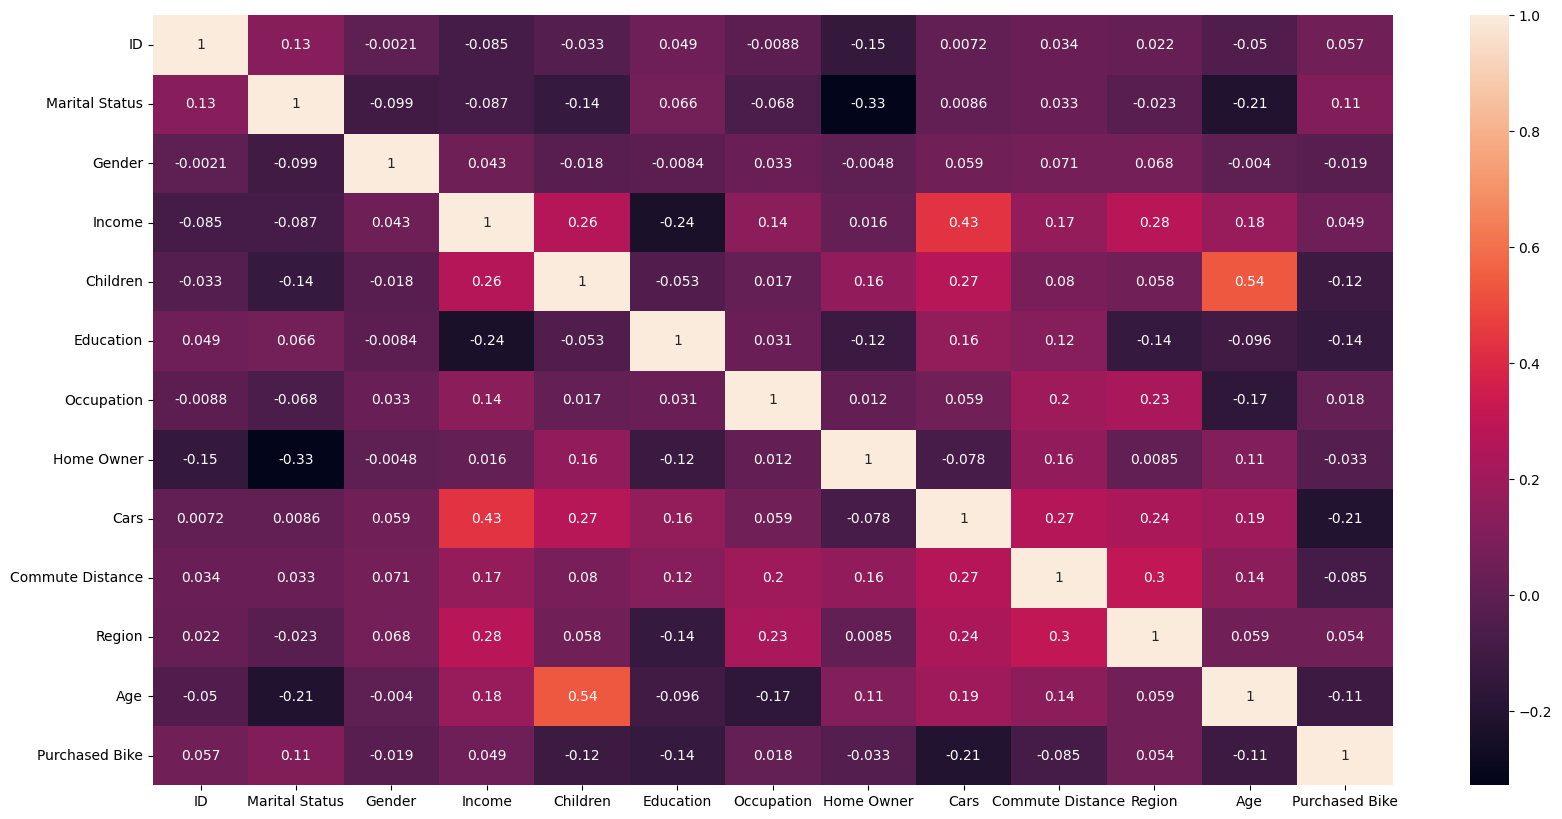

In [235]:
# Đánh giá mức độ liên quan giữa các đặc trưng với nhau.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)

Normalization

In [236]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

model=scaler.fit(data)
scaled_data=model.transform(data)
print(scaled_data)

[[0.0810972  0.         0.         ... 0.         0.265625   0.        ]
 [0.71052204 0.         1.         ... 0.         0.28125    0.        ]
 [0.17222313 0.         1.         ... 0.         0.546875   0.        ]
 ...
 [0.95798775 1.         1.         ... 0.5        0.15625    1.        ]
 [0.46966987 1.         1.         ... 0.5        0.203125   0.        ]
 [0.06076869 1.         1.         ... 0.5        0.4375     1.        ]]


In [237]:
# split data
X = scaled_data[:,:-1]
print(X[0][:])
y = data.iloc[:,-1].values
print(y[0])

[0.0810972 0.        0.        0.1875    0.2       0.        1.
 1.        0.        0.        0.        0.265625 ]
0


In [238]:
# Chọn 6 đặc trưng có mức độ liên quan cao nhất đến việc mua hay không

from sklearn.feature_selection import SelectKBest, chi2

select_feature =  SelectKBest(score_func=chi2, k = 6)
f_best = select_feature.fit(X, y)
X_new = f_best.transform(X)
X_new.shape

(952, 6)

In [239]:
data_score = pd.DataFrame(select_feature.scores_)
data_columns = pd.DataFrame(data.columns[:-1])

feature_score = pd.concat([data_columns, data_score], axis = 1)
feature_score.columns = ['Features', 'Score']
feature_score

,Features,Score
0,ID,0.526302
1,Marital Status,5.824995
2,Gender,0.164689
3,Income,0.295499
4,Children,3.635459
5,Education,4.980996
6,Occupation,0.074135
7,Home Owner,0.327737
8,Cars,8.518582
9,Commute Distance,2.524616


In [240]:
kept_features = pd.DataFrame({'columns': data.columns[:-1],
                              'Kept': select_feature.get_support()})
kept_features

,columns,Kept
0,ID,False
1,Marital Status,True
2,Gender,False
3,Income,False
4,Children,True
5,Education,True
6,Occupation,False
7,Home Owner,False
8,Cars,True
9,Commute Distance,True


In [241]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_new, y, random_state = 42, test_size=0.2)

In [242]:
scaled_data

array([[0.0810972 , 0.        , 0.        , ..., 0.        , 0.265625  ,
        0.        ],
       [0.71052204, 0.        , 1.        , ..., 0.        , 0.28125   ,
        0.        ],
       [0.17222313, 0.        , 1.        , ..., 0.        , 0.546875  ,
        0.        ],
       ...,
       [0.95798775, 1.        , 1.        , ..., 0.5       , 0.15625   ,
        1.        ],
       [0.46966987, 1.        , 1.        , ..., 0.5       , 0.203125  ,
        0.        ],
       [0.06076869, 1.        , 1.        , ..., 0.5       , 0.4375    ,
        1.        ]])

In [243]:
data

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,0,0,40000.0,1.0,0,4,1,0.0,0,0,42.0,0
1,24107,0,1,30000.0,3.0,3,0,1,1.0,0,0,43.0,0
2,14177,0,1,80000.0,5.0,3,3,0,2.0,3,0,60.0,0
4,25597,1,1,30000.0,0.0,0,0,0,0.0,0,0,36.0,1
5,13507,0,0,10000.0,2.0,3,2,1,0.0,1,0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,13466,0,1,80000.0,5.0,3,3,1,3.0,1,1,46.0,0
995,23731,0,1,60000.0,2.0,2,3,1,2.0,3,1,54.0,1
996,28672,1,1,70000.0,4.0,1,3,1,0.0,3,1,35.0,1
998,19664,1,1,100000.0,3.0,0,1,0,3.0,1,1,38.0,0


# CÁC MÔ HÌNH HỌC MÁY CƠ BẢN (ĐÃ PREVENT OVERFITTING)

In [271]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Overfitting is not something we should worry that much with NAIVE BAYES. It’s more likely to underfit. NAIVE BAYES is a fairly simple algorithm, making a strong assumption of independence between the features, so it would be biased and less flexible, hence less likely to overfit

## Gaussian Naive Bayes (Features Selection)


In [283]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

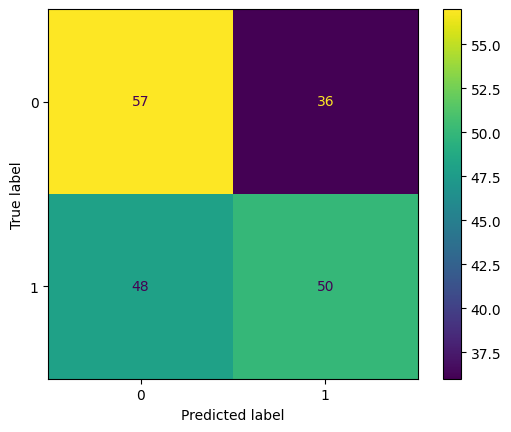

In [282]:
Y_pred = gnb.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [246]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.54      0.61      0.58        93
           1       0.58      0.51      0.54        98

    accuracy                           0.56       191
   macro avg       0.56      0.56      0.56       191
weighted avg       0.56      0.56      0.56       191



## Multinomial Naive Bayes

In [247]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

MultinomialNB()

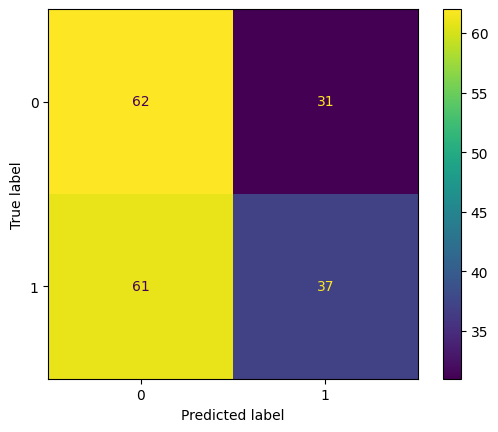

In [248]:
# test model
Y_pred = mnb.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [249]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57        93
           1       0.54      0.38      0.45        98

    accuracy                           0.52       191
   macro avg       0.52      0.52      0.51       191
weighted avg       0.52      0.52      0.51       191



## Bernoulli Naive Bayes

In [250]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, Y_train)

BernoulliNB()

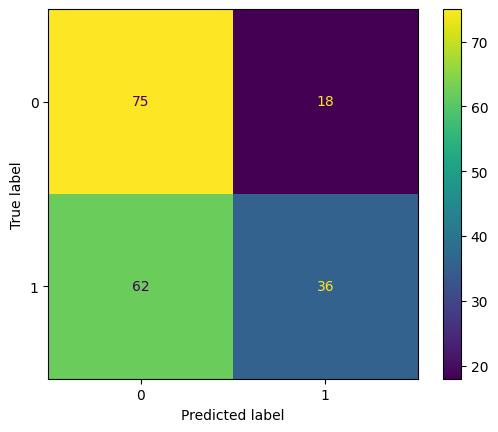

In [251]:
# test model
Y_pred = bnb.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [252]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.55      0.81      0.65        93
           1       0.67      0.37      0.47        98

    accuracy                           0.58       191
   macro avg       0.61      0.59      0.56       191
weighted avg       0.61      0.58      0.56       191



## K Nearest Neighbor (Smoothing)


In [272]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 5, p=2, metric='euclidean')
KNN.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean')

In [254]:
# test model
Y_pred = KNN.predict(X_test)

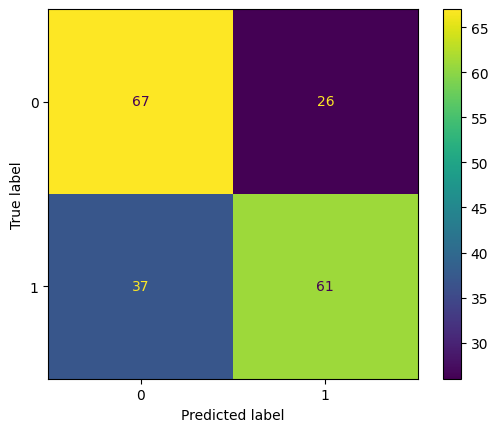

In [255]:
# test model
Y_pred = KNN.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [256]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.64      0.72      0.68        93
           1       0.70      0.62      0.66        98

    accuracy                           0.67       191
   macro avg       0.67      0.67      0.67       191
weighted avg       0.67      0.67      0.67       191



## Decision Tree (Pruning)

In [278]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion="entropy", splitter="best",
                              min_samples_split=2, min_samples_leaf=5, max_depth=None)
dTree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5)

In [279]:
Y_pred = dTree.predict(X_test)

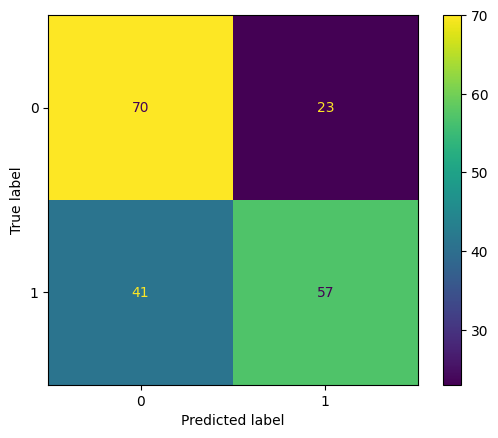

In [280]:
# test model
Y_pred = dTree.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [260]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.59      0.75      0.66        93
           1       0.68      0.51      0.58        98

    accuracy                           0.63       191
   macro avg       0.64      0.63      0.62       191
weighted avg       0.64      0.63      0.62       191



## MLP Classifier

In [261]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(20, 10, 5), batch_size= 10, activation='tanh', max_iter=100)
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', batch_size=10, hidden_layer_sizes=(20, 10, 5),
              max_iter=100)

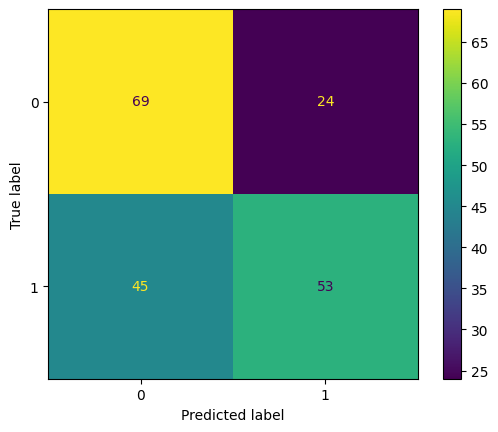

In [262]:
Y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


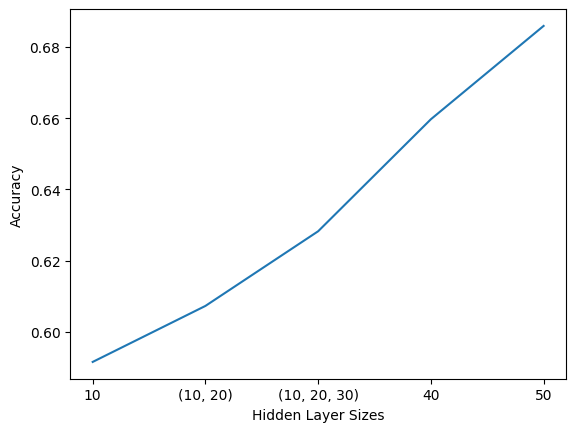

In [263]:
hidden_layer_sizes = [(10), (10, 20), (10, 20, 30), (40), (50)]
accuracies = []
for hls in hidden_layer_sizes:
    # Initialize the classifier
    mlp = MLPClassifier(hidden_layer_sizes=hls)

    # Train the classifier
    mlp.fit(X_train, Y_train)

    # Make predictions
    predictions = mlp.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, predictions)

    # Append accuracy to the accuracies list
    accuracies.append(accuracy)

# Plot the accuracies
plt.plot([str(hls) for hls in hidden_layer_sizes], accuracies)
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy')
plt.show()

# CÁC MÔ HÌNH HỌC MÁY THUỘC ENSEMBLE LEARNING

In [264]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Bagging

In [265]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(estimator=DecisionTreeClassifier(),
                        n_estimators=10, random_state=0).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

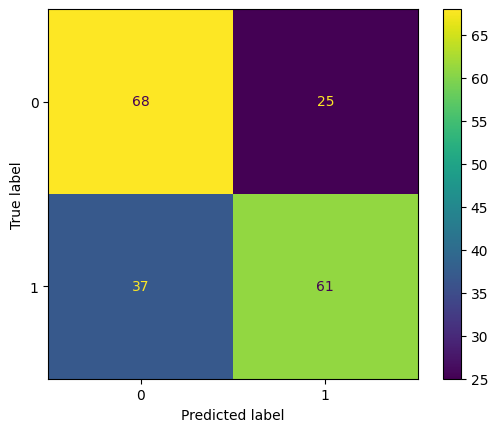

In [266]:
cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Gradient Boosting

In [288]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

Accuracy: 0.7068062827225131


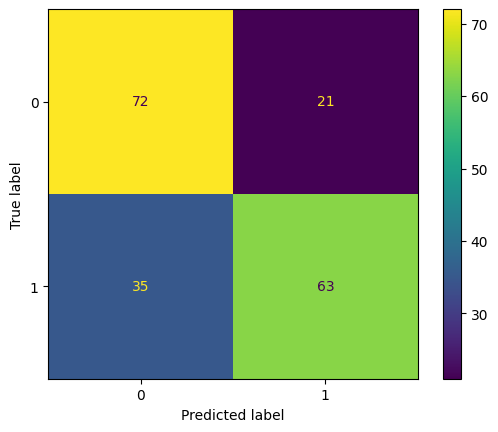

In [290]:
cm = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## AdaBoost

Accuracy: 0.612565445026178


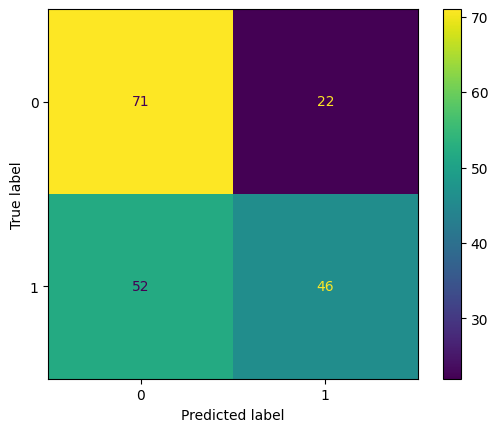

In [295]:
from sklearn.ensemble import AdaBoostClassifier

# Create and fit an AdaBoosted decision tree
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, Y_train)

Y_pred = ada_clf.predict(X_test)

# Create Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Random Forest

              precision    recall  f1-score   support

           0       0.67      0.75      0.71        93
           1       0.74      0.65      0.69        98

    accuracy                           0.70       191
   macro avg       0.70      0.70      0.70       191
weighted avg       0.71      0.70      0.70       191

CV Scores Random Forest: 0.6741228070175439


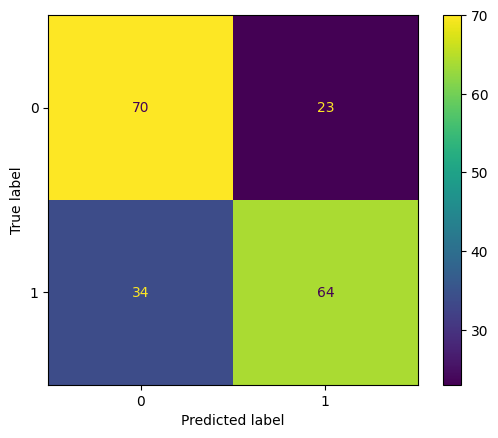

In [284]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# Perform cross-validation and training
cv_scores_rf = cross_val_score(rf, X_train, Y_train, cv=5)
rf.fit(X_train, Y_train)

# Predict and evaluate performance
Y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
print(classification_report(Y_test, Y_pred_rf))

# Compare performance with Naive Bayes and Gradient Boosting
print(f"CV Scores Random Forest: {cv_scores_rf.mean()}")